In [2]:
import os
import numpy as np 
from tensorflow.keras.datasets import imdb 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.text import Tokenizer 
import matplotlib.pyplot as plt

In [3]:
# 1. Glove 임베딩 로드
glove_dir = 'glove.6B'
embeddings_index = {}
print("Loading GloVe model...")
with open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index)) # 특정 단어의 임베딩 벡터를 읽어오기
word = 'the' # 임베딩 벡터를 읽고자 하는 단어
embedding_vector = embeddings_index.get (word)
if embedding_vector is not None:
    print(f"Embedding vector for '{word}':")
    print (embedding_vector)
else:
    print(f"Word '{word}' not found in the GloVe model.")

Loading GloVe model...
400000개의 단어 벡터를 찾았습니다.
Embedding vector for 'the':
[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38

In [4]:
# 2. IMDB 데이터셋 로드 및 전처리
max_words = 10000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [5]:
# 3. IMDB 데이터셋의 단어 인덱스를 GloVe 임베딩에 매핑
word_index = imdb.get_word_index()
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [6]:
# 4. 모델 정의
model = Sequential()
model.add(Embedding(max_words, embedding_dim, weights=[embedding_matrix],
                    input_length=maxlen, trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# 5. 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# 6. 모델 훈련
history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


196/196 ━━━━━━━━━━━━━━━━━━━━ 36s 172ms/step - accuracy: 0.5047 - loss: 0.6940 - val_accuracy: 0.5226 - val_loss: 0.6911
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 40s 205ms/step - accuracy: 0.5338 - loss: 0.6898 - val_accuracy: 0.5673 - val_loss: 0.6809
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 214ms/step - accuracy: 0.5718 - loss: 0.6779 - val_accuracy: 0.6061 - val_loss: 0.6608
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 48s 244ms/step - accuracy: 0.6056 - loss: 0.6621 - val_accuracy: 0.6224 - val_loss: 0.6506
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 62s 319ms/step - accuracy: 0.6205 - loss: 0.6549 - val_accuracy: 0.6227 - val_loss: 0.6488
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 59s 299ms/step - accuracy: 0.6326 - loss: 0.6440 - val_accuracy: 0.6347 - val_loss: 0.6387
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 56s 284ms/step - accuracy: 0.6417 - loss: 0.6335 - val_accuracy: 0.6245 - val_loss: 0.6438
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 55s 282ms/step - accuracy: 0.6495 - loss: 0.6288 - val

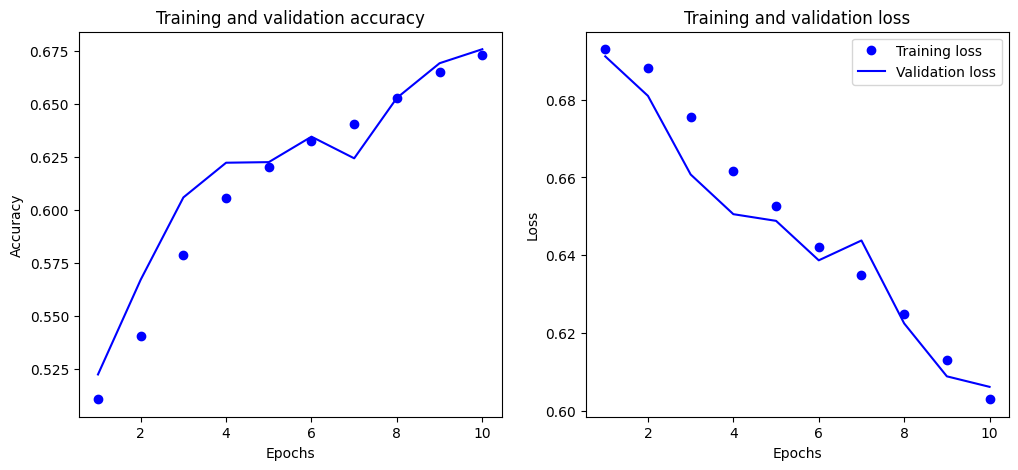

In [7]:
# 7. 정확도와 손실 그래프 그리기
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12, 5))
# 정확도 그래포
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
# 모델로 예측
test_texts = [ #아래 문장은 강의 채널에 올려 놓음
    "I hated this movie. It was terrible and the acting was horrible.",
    "This was the worst film I have ever seen. Not worth the time.",
    "I loved this movie. It was fantastic and the acting was great.",
    "This was the best film I have seen in a long time. Totally worth it.",
    "I had high hopes for this movie, but it was a complete letdown . . . ",
    "This film was a disaster from start to finish. The dialogue  . . . ",
    "What an amazing film! The plot was deeply engaging, . . . ",
    "I was thoroughly impressed by this film. . . . "
]

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(test_texts)
sequences = tokenizer.texts_to_sequences(test_texts)
test_data = pad_sequences(sequences, maxlen=maxlen)

predictions = model.predict(test_data)

for i, text in enumerate(test_texts):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {'Positive' if predictions[i] > 0.5 else 'Negative'}")
    print(f"Prediction Score{predictions[i][0]}")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
Text: I hated this movie. It was terrible and the acting was horrible.
Predicted Sentiment: Positive
Prediction Score0.5218440294265747

Text: This was the worst film I have ever seen. Not worth the time.
Predicted Sentiment: Negative
Prediction Score0.3799704611301422

Text: I loved this movie. It was fantastic and the acting was great.
Predicted Sentiment: Positive
Prediction Score0.5251695513725281

Text: This was the best film I have seen in a long time. Totally worth it.
Predicted Sentiment: Positive
Prediction Score0.5831234455108643

Text: I had high hopes for this movie, but it was a complete letdown . . . 
Predicted Sentiment: Positive
Prediction Score0.5966938734054565

Text: This film was a disaster from start to finish. The dialogue  . . . 
Predicted Sentiment: Negative
Prediction Score0.4113125205039978

Text: What an amazing film! The plot was deeply engaging, . . . 
Predicted Sentiment: Positive
Prediction Score0.5645947456359863

T

정확도가 오히려 떨어진 이유: 사전훈련된 임베딩 벡터가 imdb 데이터셋의 특징을 완벽하게 담지 못함